<a href="https://colab.research.google.com/github/Ajwad07/ML_projects_/blob/main/AE_mnist_conv_layer_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 9.91M/9.91M [00:00<00:00, 22.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 624kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.52MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.95MB/s]


Epoch [1/5], Loss: 0.0024
Epoch [2/5], Loss: 0.0014
Epoch [3/5], Loss: 0.0012
Epoch [4/5], Loss: 0.0009
Epoch [5/5], Loss: 0.0008


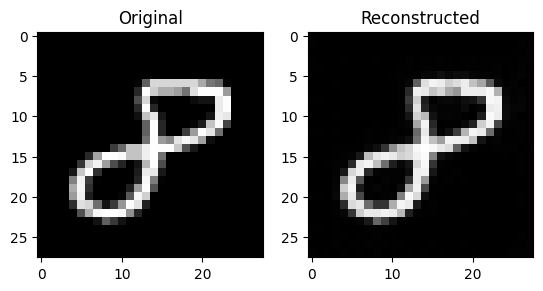

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Data
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

# Model
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU(True),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, output_padding=1, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 1, 3, stride=2, output_padding=1, padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ConvAutoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training
num_epochs = 5
for epoch in range(num_epochs):
    for img, _ in trainloader:
        img = img.to(device)
        output = model(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Visualize
model.eval()
with torch.no_grad():
    imgs, _ = next(iter(trainloader))
    imgs = imgs.to(device)
    recon = model(imgs)
    # Show original and reconstructed
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(imgs[0].cpu().squeeze(), cmap='gray')
    axes[0].set_title('Original')
    axes[1].imshow(recon[0].cpu().squeeze(), cmap='gray')
    axes[1].set_title('Reconstructed')
    plt.show()